# Yahoo Finance Market EDA

> click [here](https://docs.google.com/document/d/1nlKlCDcs9aQovlmxv4zgyyy0BM8EfaPjDV_s8lNzu1g/edit?usp=sharing) for questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('yahoo_data.xlsx', engine = 'openpyxl')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [3]:
# renaming the columns
df.rename(columns = {'Date':'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close*':'close', 'Adj Close**':'adj_close', 'Volume':'volume'}, inplace = True)

In [4]:
df.head()

,date,open,high,low,close,adj_close,volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [10]:
# saving it to new dataset
df.to_excel('updated_data.xlsx', index=False)

In [9]:
# update the dataframe in df
df = pd.read_excel('updated_data.xlsx',engine = 'openpyxl')
df.head()

,date,open,high,low,close,adj_close,volume
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000


### How does the closing price change over time?




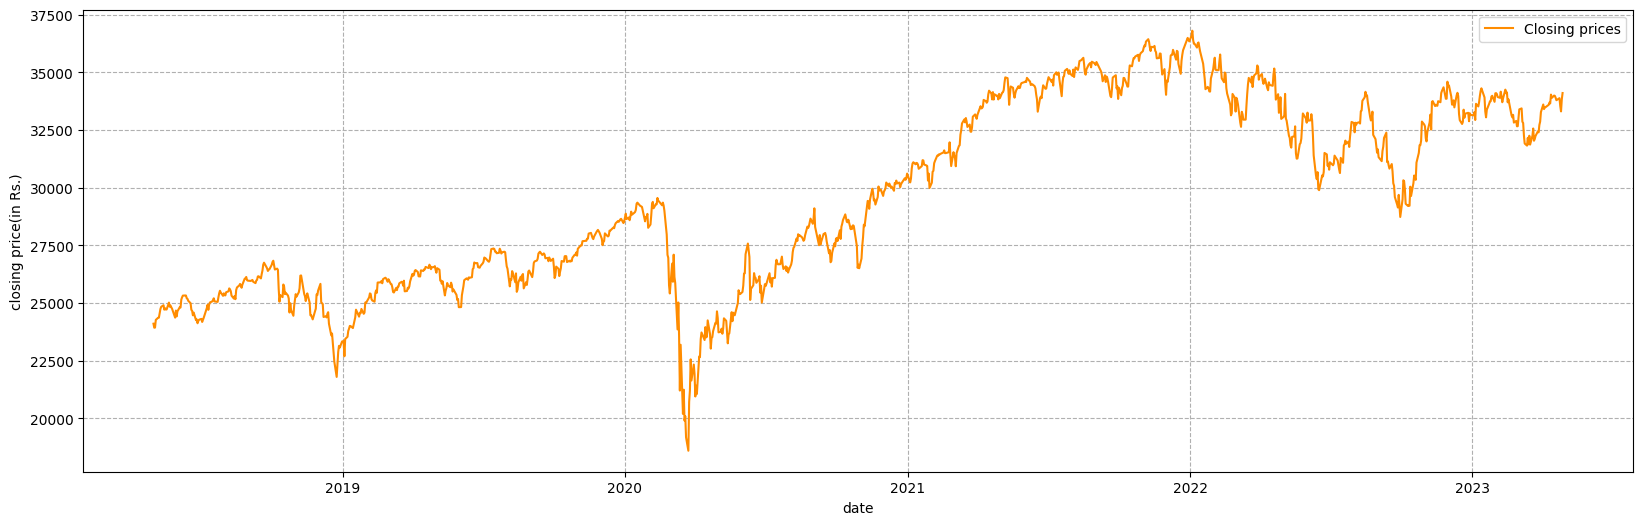

In [19]:
# date wise closing price
plt.figure(figsize = (20,6))
plt.plot(df['date'], df['close'], color = 'darkorange', label = 'Closing prices')
plt.xlabel('date')
plt.ylabel('closing price(in Rs.)')
plt.legend()
plt.grid(axis = 'both', linestyle = 'dashed')
plt.show()

> Overall, the closing number is increased over time
- the peak was on 2022

### On how many days did the stock close higher than it opened?

In [23]:
df[df['close'] > df['open']].shape[0]

674

> on total 674 days, the closing was greater than opening

### On how many days did it close lower than it opened?

In [24]:
df[df['close'] < df['open']].shape[0]

584

> on total 584 days, the closing was lower than opening

### What is the average daily price range (High − Low)?

In [27]:
df['daily_price_range'] = (df['high'] - df['low'])
df.head()

,date,open,high,low,close,adj_close,volume,daily_price_range
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,376.16
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,485.10
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,409.98
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,350.10
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,165.06


In [28]:
df['daily_price_range'].mean()

np.float64(374.5135135135135)

### Which day had the highest intraday price movement?

In [53]:
# movement -> High  - low
# highest
df.loc[df['daily_price_range'].idxmax(),['date','daily_price_range']]


date                 2020-03-13 00:00:00
daily_price_range                1904.39
Name: 787, dtype: object

### How frequently does the price stay within a narrow range?

In [39]:
# mean daily range
df['daily_price_range'].mean()

np.float64(374.5135135135135)

In [41]:
# narrow: if daily price range < mean
df[df['daily_price_range'] < df['daily_price_range'].mean()]

,date,open,high,low,close,adj_close,volume,daily_price_range
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,350.10
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,165.06
5,2023-04-21,33793.60,33858.83,33688.57,33808.96,33808.96,291080000,170.26
6,2023-04-20,33740.60,33875.39,33677.74,33786.62,33786.62,307910000,197.65
7,2023-04-19,33889.83,33957.98,33814.65,33897.01,33897.01,251490000,143.33
...,...,...,...,...,...,...,...,...
1251,2018-05-09,24399.18,24586.48,24323.87,24542.54,24542.54,361580000,262.61
1252,2018-05-08,24341.35,24412.34,24198.34,24360.21,24360.21,344940000,214.00
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,216.03
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,299.22


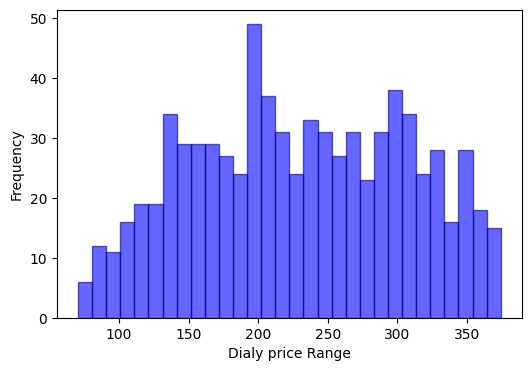

In [ ]:
# Improved histogram of daily price ranges less than the mean
plt.figure(figsize=(10,6))
narrow_range = df[df['daily_price_range'] < df['daily_price_range'].mean()]['daily_price_range']
plt.hist(narrow_range, bins=20, color='#4F8EF7', edgecolor='white', alpha=0.85)
plt.xlabel('Daily Price Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Narrow Daily Price Ranges', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Are there periods where the price is mostly rising or mostly falling?

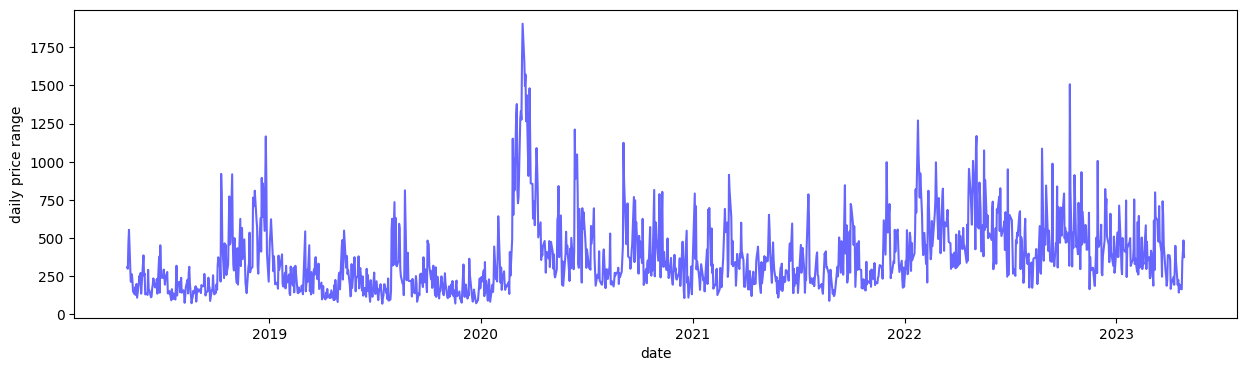

In [44]:
plt.figure(figsize=(15,4))
plt.plot(df['date'], df['daily_price_range'], color = 'blue', alpha = 0.6, label = 'daily price range')
plt.xlabel('date')
plt.ylabel('daily price range')
plt.show()

> yes after 2020, the price is mostly rising and reaches the peak

> and it then continously plummets

> then again it rises

> its a rough oscillation

### How volatile is the stock based on daily price movement?

In [46]:
# normalized volatility
# (high - low)/closing
df['norm_vlty'] = (df['high'] - df['low']) / df['close']
df.head()

,date,open,high,low,close,adj_close,volume,daily_price_range,norm_vlty
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,376.16,0.011032
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,485.10,0.014341
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,409.98,0.012311
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,350.10,0.010441
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,165.06,0.004873


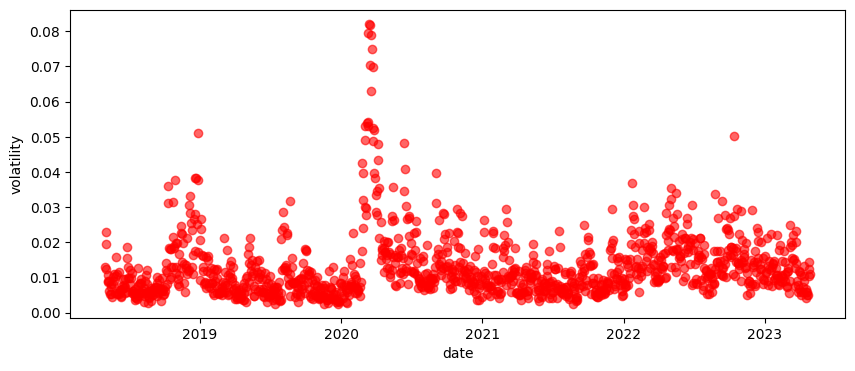

In [50]:
plt.figure(figsize = (10,4))
plt.scatter(df['date'], df['norm_vlty'], color = 'red', alpha = 0.6)
plt.xlabel('date')
plt.ylabel('volatility')
plt.show()

In [54]:
df.loc[df['norm_vlty'].idxmax(), ['date','norm_vlty']]

date         2020-03-13 00:00:00
norm_vlty               0.082137
Name: 787, dtype: object

In [55]:
# average volatility on daily basis
df['norm_vlty'].mean()

np.float64(0.01291996368429215)

### Is the adjusted close smoother than the close price over time?

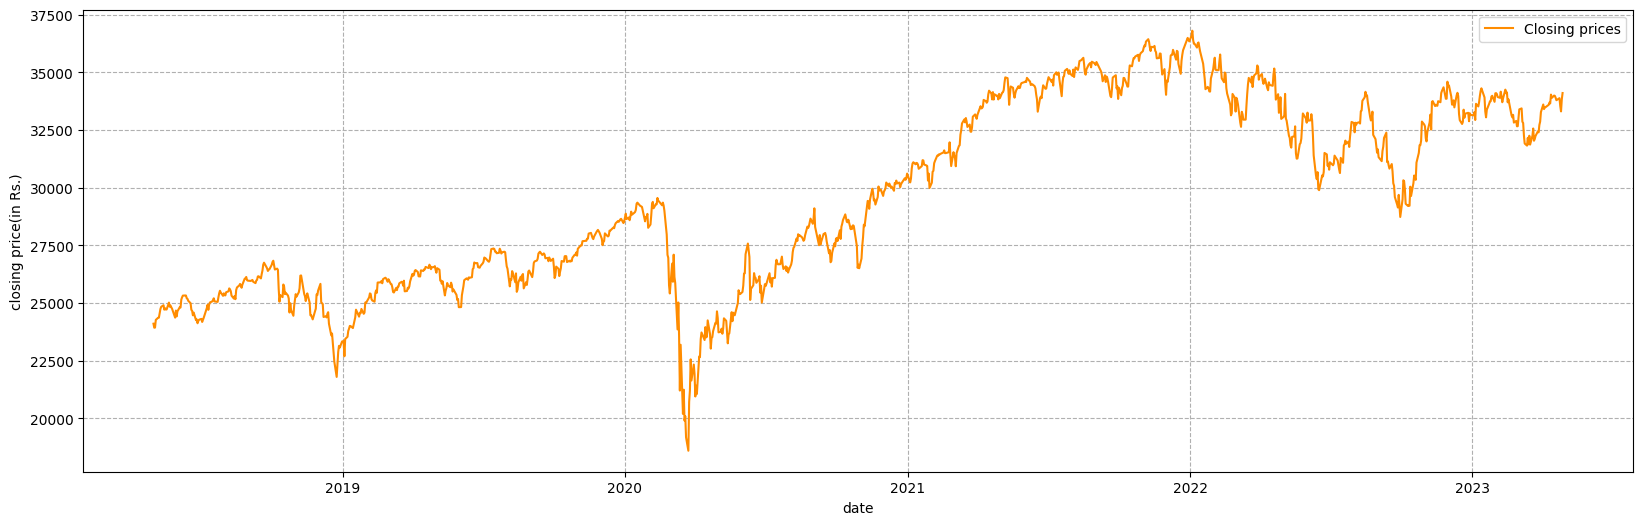

In [56]:
# closing price
plt.figure(figsize = (20,6))
plt.plot(df['date'], df['close'], color = 'darkorange', label = 'Closing prices')
plt.xlabel('date')
plt.ylabel('closing price(in Rs.)')
plt.legend()
plt.grid(axis = 'both', linestyle = 'dashed')
plt.show()

In [57]:
# standard deviation of closing price
df['close'].std()

np.float64(4007.468821516462)

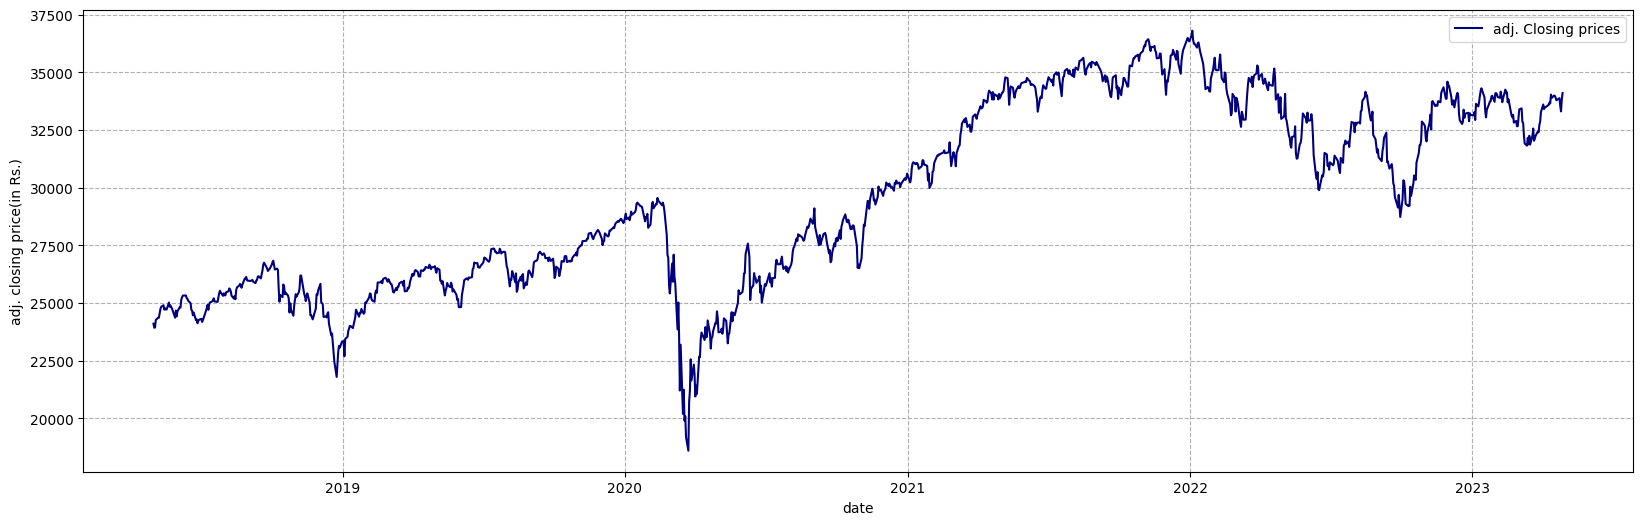

In [60]:
# adjusted closing price
plt.figure(figsize = (20,6))
plt.plot(df['date'], df['adj_close'], color = 'navy', label = 'adj. Closing prices')
plt.xlabel('date')
plt.ylabel('adj. closing price(in Rs.)')
plt.legend()
plt.grid(axis = 'both', linestyle = 'dashed')
plt.show()

In [61]:
df['close'].std()

np.float64(4007.468821516462)

> both are the same